In [2]:
from glob import glob

In [3]:
files = glob("Data/**/**/*.nii.gz")
files

['Data\\Pre-processed\\AD\\10_ADNI_023_S_0916_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20081027124305165_S56855_I1240972_norm.nii.gz',
 'Data\\Pre-processed\\AD\\11_ADNI_023_S_0916_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001154332202_S19523_I1188802_norm.nii.gz',
 'Data\\Pre-processed\\AD\\12_ADNI_023_S_1262_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20070805140940607_S27243_I648622_norm.nii.gz',
 'Data\\Pre-processed\\AD\\13_ADNI_023_S_1262_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001160446675_S27243_I1189242_norm.nii.gz',
 'Data\\Pre-processed\\AD\\14_ADNI_023_S_1262_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080421163348281_S47824_I1032762_norm.nii.gz',
 'Data\\Pre-processed\\AD\\15_ADNI_023_S_1262_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20090512153916694_S64543_I1436852_norm.nii.gz',
 'Data\\Pre-processed\\AD\\16_ADNI_027_S_0404_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061222193516770_S14494_I341952_norm.nii.gz',
 'Data\

In [30]:
from datetime import datetime
import pandas as pd

def extract_data(fp):
    # print(fp)
    if "sub" not in fp:
        # 27_ADNI_027_S_1385_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20090505102357735_S64402_I1431782_norm.nii.gz
        subject = fp[fp.index("S_")+2:]
        subject=subject[:subject.index("_")]

        time = fp[fp.index("200"):]
        time = time[:time.index("_")]
        time = datetime(int(time[:4]),int(time[4:6]),int(time[6:8]),int(time[8:10]),int(time[10:12]),int(time[12:14]))
    else:
        # 1_sub-ADNI002S0413_ses-M162_T1w2_norm.nii.gz
        subject = fp[fp.index("S")+1:]
        subject=subject[:subject.index("_")]

        time = None

    group = fp[19:]
    group = group[:group.index("\\")]

    return {"subject":subject,"time":time,"fp":fp, "group":group}

df = pd.DataFrame([extract_data(fp) for fp in files if not "FSL" in fp])
# extract_data(files[0])
df

,subject,time,fp,group
0,0916,2008-10-27 12:43:05,Data\Pre-processed\AD\10_ADNI_023_S_0916_MR_MP...,AD
1,0916,2008-10-01 15:43:32,Data\Pre-processed\AD\11_ADNI_023_S_0916_MR_MP...,AD
2,1262,2007-08-05 14:09:40,Data\Pre-processed\AD\12_ADNI_023_S_1262_MR_MP...,AD
3,1262,2008-10-01 16:04:46,Data\Pre-processed\AD\13_ADNI_023_S_1262_MR_MP...,AD
4,1262,2008-04-21 16:33:48,Data\Pre-processed\AD\14_ADNI_023_S_1262_MR_MP...,AD
...,...,...,...,...
405,1066,2008-02-20 10:34:35,Data\Pre-processed\MCI\54_ADNI_031_S_1066_MR_M...,MCI
406,1066,2008-12-04 17:11:22,Data\Pre-processed\MCI\55_ADNI_031_S_1066_MR_M...,MCI
407,0579,2008-10-14 11:48:57,Data\Pre-processed\MCI\57_ADNI_136_S_0579_MR_M...,MCI
408,1070,2008-12-24 11:05:57,Data\Pre-processed\MCI\6_ADNI_002_S_1070_MR_MP...,MCI


In [35]:
all_subjects = list(set(df["subject"]))

from Architectures.AE import AE
from Data.load import load_single
import numpy as np
ae = AE.open("Trained Models/AE/30")

all_z = []
subject_z = {}

for subject in all_subjects:
    records = df[df["subject"]==subject]
    # Read all files
    images = np.concatenate([load_single(fp[5:]) for fp in records["fp"]])
    z = ae.encode(images)
    all_z.extend(z)
    subject_z[subject] = z



Models loaded and compiled successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━

In [36]:
all_z = np.stack(all_z)

Text(0.5, 1.0, 'Latent space movements over time')

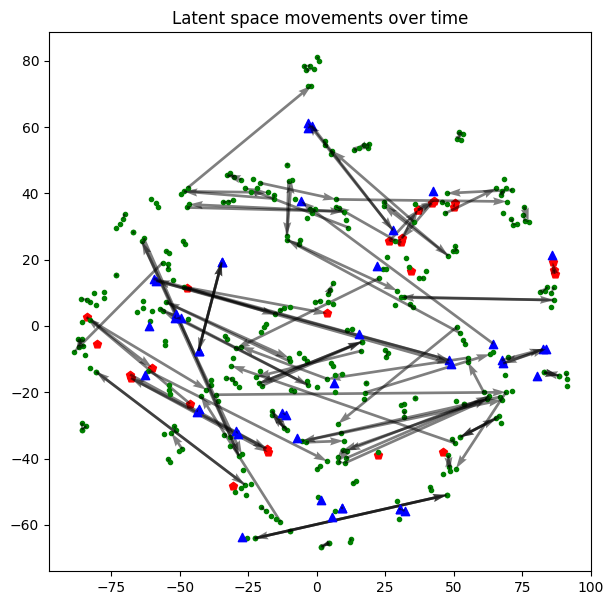

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


plt.figure(figsize=(7,7))
# Assume all_z is a NumPy array containing all data points
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embedded = tsne.fit_transform(all_z)  # Fit and transform once


group_markers = {"CN":".","MCI":"^","AD":"p"}
group_colors = {"CN":"g","MCI":"b","AD":"r"}
# Assign t-SNE results back to subjects
start_idx = 0
for subject in subject_z:
    data = subject_z[subject]
    num_points = len(data)
    r = embedded[start_idx:start_idx + num_points]  # Extract corresponding transformed points
    group = df.loc[start_idx,"group"]
    start_idx += num_points
    plt.scatter(r[:, 0], r[:, 1], marker=group_markers[group],color=group_colors[group])
    plt.quiver(
        r[:-1, 0], r[:-1, 1],  # Starting points (x, y)
        r[1:, 0] - r[:-1, 0], r[1:, 1] - r[:-1, 1],  # Differences (dx, dy)
        angles="xy", scale_units="xy", scale=1, width=0.005,alpha=0.5
    )

# plt.legend()
plt.title("Latent space movements over time")